<a href="https://colab.research.google.com/github/diegootero11/TFG-CODIGO-Y-BASES-DE-DATOS-DIEGO-OTERO/blob/main/AN%C3%81LISIS_DEL_DATO_IPOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_ipos = pd.read_excel("df_ipos_no_null.xlsx")


df_ipos.head()

,IssuerBorrower_Nation,IssuerBorrower_Stock_Exchange_Name,Offering_Technique,Security_Type_All_Markets,IssuerBorrower_TRBC_Industry,Shares_Offered_All_Markets_ΣCom,Offer_Price_Uniform_ΣCom,Financials_Market_Value_Before_Offer_USD_Millions_ΣCom,Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom,Financials_Book_Value_per_Share_Before_Offer_USD_ΣCom,Financials_EBITDA_Before_Offering_USD_Millions_ΣCom,Financials_Net_Income_After_Taxes_Before_Offering_USD_Millions_ΣCom,Financials_Total_Assets_Before_Offering_USD_Millions_ΣCom,Financials_Common_Equity_Before_Offering_USD_Millions_ΣCom,GDP_Announced,CPI_Announced,Interest_Rate_Announced,M2_Announced
0,Japan,Jasdaq,Firm Commitment,Common Stock,Software,1600.0,13492.85,69.99,21.59,1550.41,0.0,0.0,33.0,8.04,-0.3,0.5,0.0,4.12
1,Japan,Mothers,Firm Commitment,Common Stock,Semiconductor\nEquipment &\nTesting,1688.0,8564.92,61.12,16.60,1373.74,0.0,0.0,35.3,9.80,0.4,-0.1,0.0,-2.08
2,Japan,Nip Her St,Firm Commitment,Common Stock,Online Services,1200.0,6109.60,32.20,7.33,2137.44,0.0,0.0,24.6,11.21,0.8,-0.2,0.0,-2.02
3,Japan,Jasdaq,Firm Commitment,Common Stock,Integrated\nTelecommunications\nServices,7100.0,4871.65,148.08,34.59,1758.40,9.2,5.6,114.7,53.39,1.2,0.0,0.0,-2.81
4,Japan,Jasdaq,Firm Commitment,Common Stock,Office Equipment,4000.0,4206.01,70.11,16.82,1879.94,0.0,0.0,170.4,31.40,1.1,-0.1,0.5,0.71


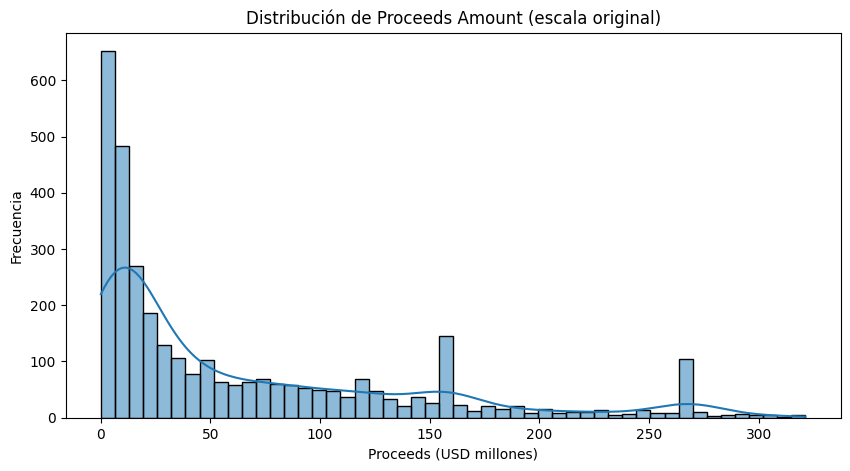

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(10, 5))
sns.histplot(df_ipos['Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom'], bins=50, kde=True)
plt.title('Distribución de Proceeds Amount (escala original)')
plt.xlabel('Proceeds (USD millones)')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:

num_filas, num_columnas = df_ipos.shape
print(f"Número de observaciones: {num_filas}")
print(f"Número de variables: {num_columnas}")


Número de observaciones: 3292
Número de variables: 18


In [ ]:

categorical_columns = df_ipos.select_dtypes(include=['object']).columns


unique_values = df_ipos[categorical_columns].nunique()


print(unique_values)


IssuerBorrower_Nation                  17
IssuerBorrower_Stock_Exchange_Name    130
Offering_Technique                     58
Security_Type_All_Markets              32
IssuerBorrower_TRBC_Industry           25
dtype: int64


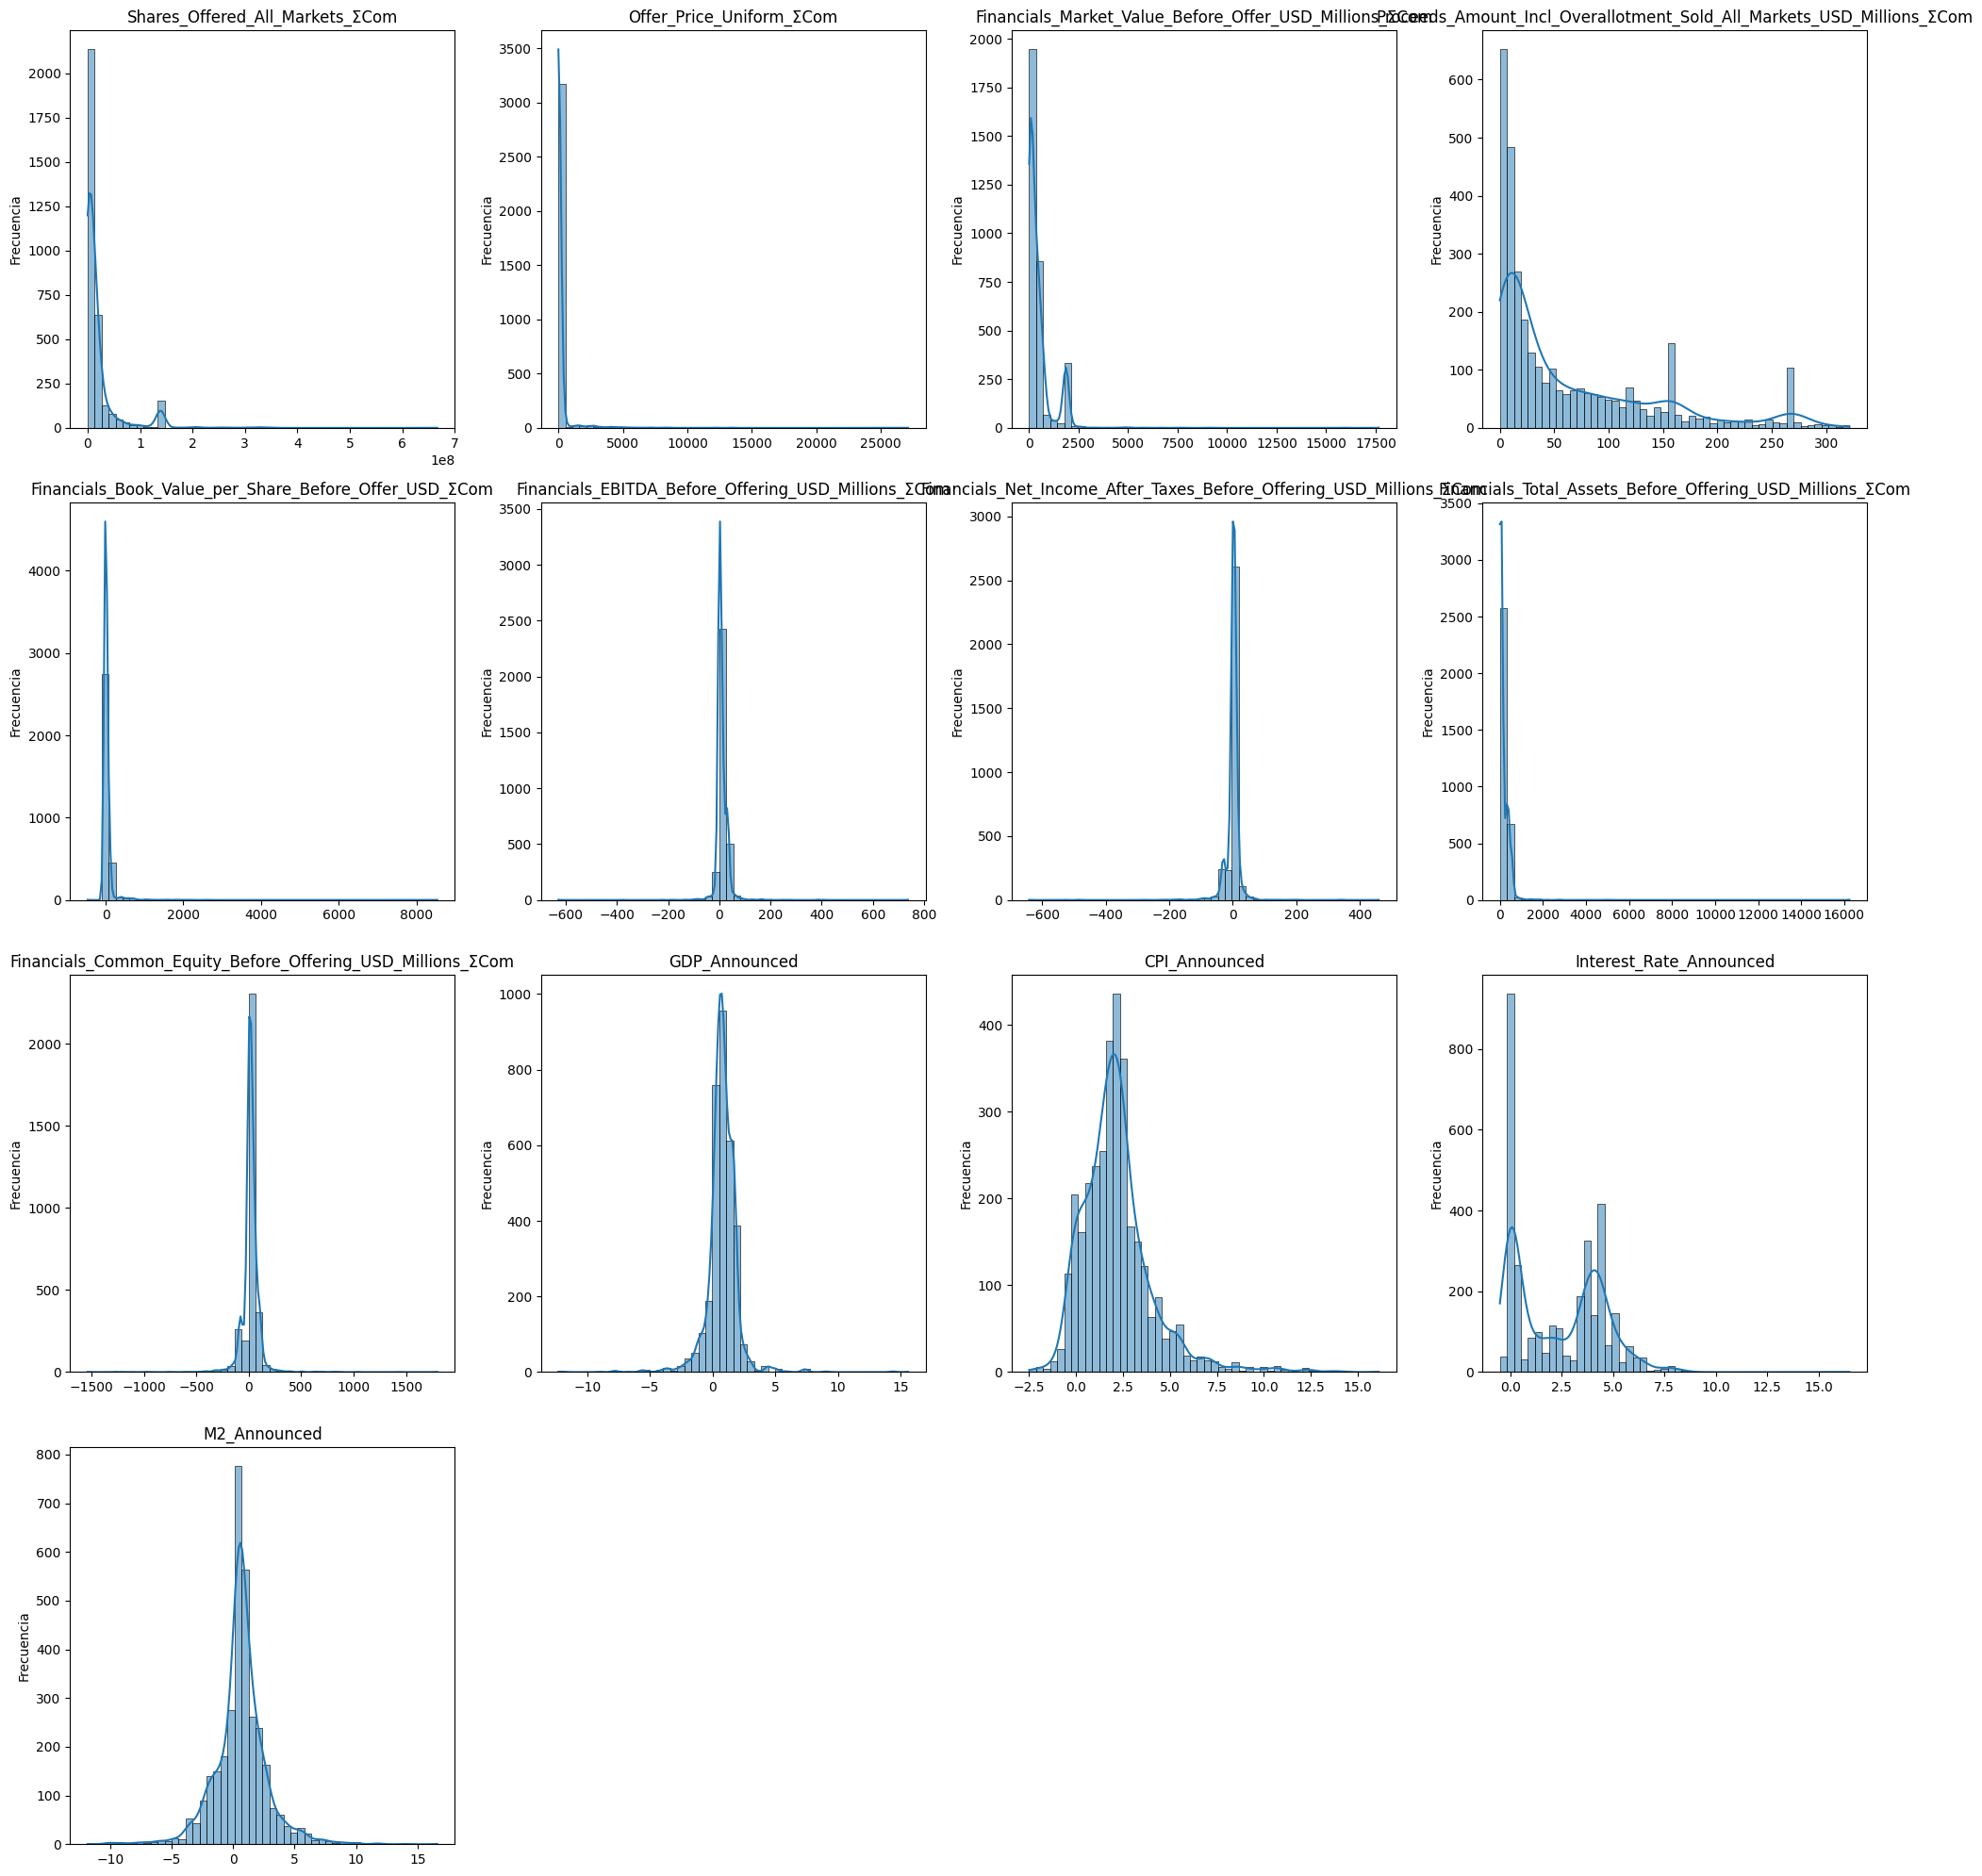

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


numeric_columns = df_ipos.select_dtypes(include=['number']).columns


num_cols = 4
num_rows = math.ceil(len(numeric_columns) / num_cols)

plt.figure(figsize=(20, num_rows * 5))


for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_ipos[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()



CODIFICAR VARIABLES CATEGORICAS



In [ ]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = [
    'IssuerBorrower_Nation',
    'IssuerBorrower_Stock_Exchange_Name',
    'Offering_Technique',
    'Security_Type_All_Markets',
    'IssuerBorrower_TRBC_Industry'
]


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_ipos[col] = le.fit_transform(df_ipos[col])
    label_encoders[col] = le


print(df_ipos.head())


   IssuerBorrower_Nation  IssuerBorrower_Stock_Exchange_Name  \
0                      8                                  38   
1                      8                                  65   
2                      8                                  88   
3                      8                                  38   
4                      8                                  38   

   Offering_Technique  Security_Type_All_Markets  \
0                  21                          7   
1                  21                          7   
2                  21                          7   
3                  21                          7   
4                  21                          7   

   IssuerBorrower_TRBC_Industry  Shares_Offered_All_Markets_ΣCom  \
0                            22                           1600.0   
1                            20                           1688.0   
2                            15                           1200.0   
3                            1

In [ ]:
print(df_ipos.dtypes)


IssuerBorrower_Nation                                                      int64
IssuerBorrower_Stock_Exchange_Name                                         int64
Offering_Technique                                                         int64
Security_Type_All_Markets                                                  int64
IssuerBorrower_TRBC_Industry                                               int64
Shares_Offered_All_Markets_ΣCom                                          float64
Offer_Price_Uniform_ΣCom                                                 float64
Financials_Market_Value_Before_Offer_USD_Millions_ΣCom                   float64
Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom    float64
Financials_Book_Value_per_Share_Before_Offer_USD_ΣCom                    float64
Financials_EBITDA_Before_Offering_USD_Millions_ΣCom                      float64
Financials_Net_Income_After_Taxes_Before_Offering_USD_Millions_ΣCom      float64
Financials_Total_Assets_Befo

In [ ]:

int64_columns = df_ipos.select_dtypes(include=['int64']).columns


min_max_values = df_ipos[int64_columns].agg(['min', 'max']).T


import pandas as pd
pd.set_option('display.max_rows', None)
print(min_max_values)


                                    min  max
IssuerBorrower_Nation                 0   16
IssuerBorrower_Stock_Exchange_Name    0  129
Offering_Technique                    0   57
Security_Type_All_Markets             0   31
IssuerBorrower_TRBC_Industry          0   24


In [ ]:

num_filas, num_columnas = df_ipos.shape
print(f"Número de observaciones: {num_filas}")
print(f"Número de variables: {num_columnas}")


total_nulos = df_ipos.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {total_nulos}")


Número de observaciones: 3292
Número de variables: 18
Total de valores nulos en el dataset: 0


In [ ]:

target = 'Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom'
media = df_ipos[target].mean()
desviacion = df_ipos[target].std()

print(f"Media de la variable target: {media:.2f}")
print(f"Desviación estándar de la variable target: {desviacion:.2f}")


Media de la variable target: 63.93
Desviación estándar de la variable target: 74.88


In [ ]:

target_min = df_ipos['Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom'].min()
target_max = df_ipos['Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom'].max()

print(f"Valor mínimo de la target: {target_min}")
print(f"Valor máximo de la target: {target_max}")


Valor mínimo de la target: 0.0
Valor máximo de la target: 321.37


In [ ]:

numeric_cols = df_ipos.select_dtypes(include=['float64']).columns


min_max_values = df_ipos[numeric_cols].agg(['min', 'max'])


print(min_max_values)


     Shares_Offered_All_Markets_ΣCom  Offer_Price_Uniform_ΣCom  \
min                             10.0                      0.01   
max                      666680000.0                  27110.07   

     Financials_Market_Value_Before_Offer_USD_Millions_ΣCom  \
min                                               0.00        
max                                           17656.37        

     Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom  \
min                                               0.00                       
max                                             321.37                       

     Financials_Book_Value_per_Share_Before_Offer_USD_ΣCom  \
min                                            -462.41       
max                                            8530.00       

     Financials_EBITDA_Before_Offering_USD_Millions_ΣCom  \
min                                             -628.8     
max                                              737.1     

     Fin

RV SEARCH DE LOS 3 MODELOS (RF, GB Y XGB)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df_ipos.drop(columns=['Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom'])
y = df_ipos['Proceeds_Amount_Incl_Overallotment_Sold_All_Markets_USD_Millions_ΣCom']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 0.8]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.8, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'reg_alpha': [0, 0.5, 1],
            'reg_lambda': [0.5, 1, 2]
        }
    }
}


results = {}

for name, config in models.items():
    print(f"\nEntrenando {name}...")
    search = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        n_iter=20,
        cv=3,
        scoring='neg_mean_absolute_error',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)

    best_model = search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    results[name] = {
        'MAE Train': mean_absolute_error(y_train, y_train_pred),
        'MAE Test': mean_absolute_error(y_test, y_test_pred),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2 Train': r2_score(y_train, y_train_pred),
        'R2 Test': r2_score(y_test, y_test_pred)
    }

    print(f"\nMejores hiperparámetros de {name}: {search.best_params_}")
    print(f"Métricas de {name}:")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")


import pandas as pd
results_df = pd.DataFrame(results).T
print("\nResumen final:")
print(results_df)



Entrenando Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores hiperparámetros de Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': None}
Métricas de Random Forest:
MAE Train: 5.6798
MAE Test: 13.5465
RMSE Train: 13.1717
RMSE Test: 31.9604
R2 Train: 0.9700
R2 Test: 0.7892

Entrenando Gradient Boosting...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores hiperparámetros de Gradient Boosting: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.1}
Métricas de Gradient Boosting:
MAE Train: 0.2423
MAE Test: 12.1104
RMSE Train: 2.8711
RMSE Test: 29.7327
R2 Train: 0.9986
R2 Test: 0.8176

Entrenando XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores hiperparámetros de XGBoost: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 10, 'lea

MODELOS AJUSTADOS MANUALMENTE

In [ ]:


models_adjusted = {
    'Random Forest': RandomForestRegressor(
        n_estimators=150,
        max_depth=7,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features=0.8,
        bootstrap=True,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        max_features=0.8,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        min_child_weight=4,
        gamma=1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1,
        reg_lambda=2,
        random_state=42,
        objective='reg:squarederror'
    )
}


results = {}

for name, model in models_adjusted.items():
    print(f"\nEntrenando {name}...")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results[name] = {
        'MAE Train': mean_absolute_error(y_train, y_train_pred),
        'MAE Test': mean_absolute_error(y_test, y_test_pred),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2 Train': r2_score(y_train, y_train_pred),
        'R2 Test': r2_score(y_test, y_test_pred)
    }

    print(f"Métricas de {name}:")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")


results_df = pd.DataFrame(results).T
print("\nResumen final:")
print(results_df)



Entrenando Random Forest...
Métricas de Random Forest:
MAE Train: 15.3675
MAE Test: 16.4576
RMSE Train: 31.4663
RMSE Test: 34.1620
R2 Train: 0.8288
R2 Test: 0.7592

Entrenando Gradient Boosting...
Métricas de Gradient Boosting:
MAE Train: 10.3804
MAE Test: 14.8081
RMSE Train: 20.5061
RMSE Test: 29.9453
R2 Train: 0.9273
R2 Test: 0.8150

Entrenando XGBoost...
Métricas de XGBoost:
MAE Train: 10.3978
MAE Test: 14.4490
RMSE Train: 20.9802
RMSE Test: 29.9189
R2 Train: 0.9239
R2 Test: 0.8153

Resumen final:
                   MAE Train   MAE Test  RMSE Train  RMSE Test  R2 Train  \
Random Forest      15.367452  16.457577   31.466334  34.162030  0.828758   
Gradient Boosting  10.380418  14.808107   20.506121  29.945255  0.927275   
XGBoost            10.397831  14.449024   20.980220  29.918870  0.923873   

                    R2 Test  
Random Forest      0.759169  
Gradient Boosting  0.814954  
XGBoost            0.815280  


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


models_adjusted = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=7,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=250,
        learning_rate=0.03,
        max_depth=3,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        max_features=0.8,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=250,
        learning_rate=0.03,
        max_depth=3,
        min_child_weight=6,
        gamma=2,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1,
        reg_lambda=2,
        objective='reg:squarederror',
        random_state=42
    )
}


results = {}

for name, model in models_adjusted.items():
    print(f"\nEntrenando {name}...")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results[name] = {
        'MAE Train': mean_absolute_error(y_train, y_train_pred),
        'MAE Test': mean_absolute_error(y_test, y_test_pred),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2 Train': r2_score(y_train, y_train_pred),
        'R2 Test': r2_score(y_test, y_test_pred)
    }

    print(f"Métricas de {name}:")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")


results_df = pd.DataFrame(results).T
print("\nResumen final:")
print(results_df)



Entrenando Random Forest...
Métricas de Random Forest:
MAE Train: 20.5230
MAE Test: 21.4196
RMSE Train: 34.7170
RMSE Test: 37.2347
R2 Train: 0.7916
R2 Test: 0.7139

Entrenando Gradient Boosting...
Métricas de Gradient Boosting:
MAE Train: 16.8116
MAE Test: 17.3356
RMSE Train: 31.1159
RMSE Test: 33.0300
R2 Train: 0.8326
R2 Test: 0.7749

Entrenando XGBoost...
Métricas de XGBoost:
MAE Train: 16.8374
MAE Test: 17.0976
RMSE Train: 31.4680
RMSE Test: 32.9451
R2 Train: 0.8287
R2 Test: 0.7760

Resumen final:
                   MAE Train   MAE Test  RMSE Train  RMSE Test  R2 Train  \
Random Forest      20.523005  21.419607   34.716978  37.234706  0.791551   
Gradient Boosting  16.811638  17.335575   31.115910  33.030046  0.832551   
XGBoost            16.837383  17.097561   31.468002  32.945072  0.828740   

                    R2 Test  
Random Forest      0.713898  
Gradient Boosting  0.774865  
XGBoost            0.776022  


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


models_adjusted = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=7,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=250,
        learning_rate=0.03,
        max_depth=3,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        max_features=0.8,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=250,
        learning_rate=0.03,
        max_depth=3,
        min_child_weight=6,
        gamma=2,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1,
        reg_lambda=2,
        objective='reg:squarederror',
        random_state=42
    )
}


results = {}
modelos_entrenados = {}

for name, model in models_adjusted.items():
    print(f"\nEntrenando {name}...")
    model.fit(X_train, y_train)
    modelos_entrenados[name] = model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results[name] = {
        'MAE Train': mean_absolute_error(y_train, y_train_pred),
        'MAE Test': mean_absolute_error(y_test, y_test_pred),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2 Train': r2_score(y_train, y_train_pred),
        'R2 Test': r2_score(y_test, y_test_pred)
    }

    print(f"Métricas de {name}:")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")


results_df = pd.DataFrame(results).T
print("\nResumen final:")
print(results_df)

import pandas as pd


feature_names = X_train.columns


importancia_tabla = {}


for name, model in modelos_entrenados.items():
    importances = model.feature_importances_
    df_importance = pd.DataFrame({
        'Variable': feature_names,
        f'Importancia {name}': importances
    }).sort_values(by=f'Importancia {name}', ascending=False).set_index('Variable')

    importancia_tabla[name] = df_importance


tabla_importancias = pd.concat(importancia_tabla.values(), axis=1).fillna(0)


tabla_importancias['Promedio'] = tabla_importancias.mean(axis=1)


tabla_top15 = tabla_importancias.sort_values(by='Promedio', ascending=False).drop(columns='Promedio').head(15)


from IPython.display import display
display(tabla_top15)



Entrenando Random Forest...
Métricas de Random Forest:
MAE Train: 20.5230
MAE Test: 21.4196
RMSE Train: 34.7170
RMSE Test: 37.2347
R2 Train: 0.7916
R2 Test: 0.7139

Entrenando Gradient Boosting...
Métricas de Gradient Boosting:
MAE Train: 16.8116
MAE Test: 17.3356
RMSE Train: 31.1159
RMSE Test: 33.0300
R2 Train: 0.8326
R2 Test: 0.7749

Entrenando XGBoost...
Métricas de XGBoost:
MAE Train: 16.8374
MAE Test: 17.0976
RMSE Train: 31.4680
RMSE Test: 32.9451
R2 Train: 0.8287
R2 Test: 0.7760

Resumen final:
                   MAE Train   MAE Test  RMSE Train  RMSE Test  R2 Train  \
Random Forest      20.523005  21.419607   34.716978  37.234706  0.791551   
Gradient Boosting  16.811638  17.335575   31.115910  33.030046  0.832551   
XGBoost            16.837383  17.097561   31.468002  32.945072  0.828740   

                    R2 Test  
Random Forest      0.713898  
Gradient Boosting  0.774865  
XGBoost            0.776022  


,Importancia Random Forest,Importancia Gradient Boosting,Importancia XGBoost
Variable,,,
Financials_Market_Value_Before_Offer_USD_Millions_ΣCom,0.232332,0.355623,0.328795
Shares_Offered_All_Markets_ΣCom,0.238880,0.289189,0.127212
Offer_Price_Uniform_ΣCom,0.099837,0.177393,0.087064
Financials_Total_Assets_Before_Offering_USD_Millions_ΣCom,0.083783,0.041409,0.070735
Financials_Book_Value_per_Share_Before_Offer_USD_ΣCom,0.036151,0.023445,0.070292
Financials_Common_Equity_Before_Offering_USD_Millions_ΣCom,0.065260,0.024576,0.036178
IssuerBorrower_Stock_Exchange_Name,0.058322,0.012573,0.035253
Offering_Technique,0.020815,0.021778,0.051819
Financials_Net_Income_After_Taxes_Before_Offering_USD_Millions_ΣCom,0.044082,0.008986,0.028002


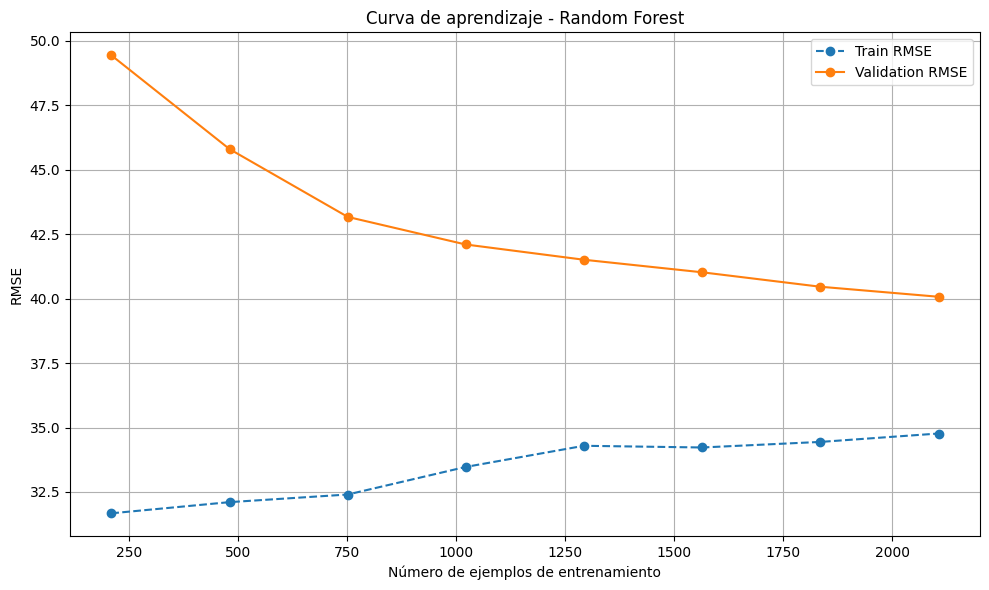

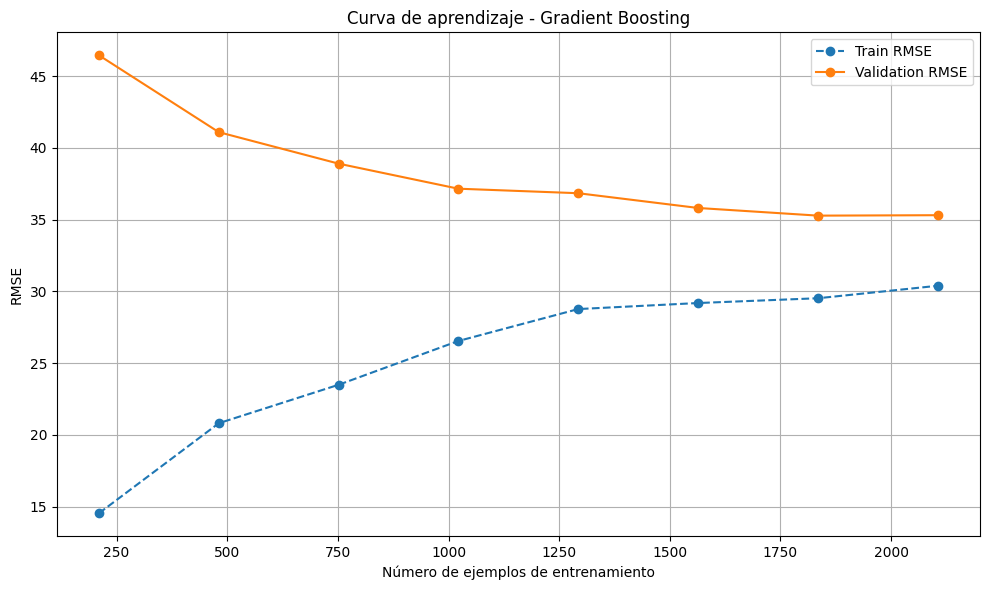

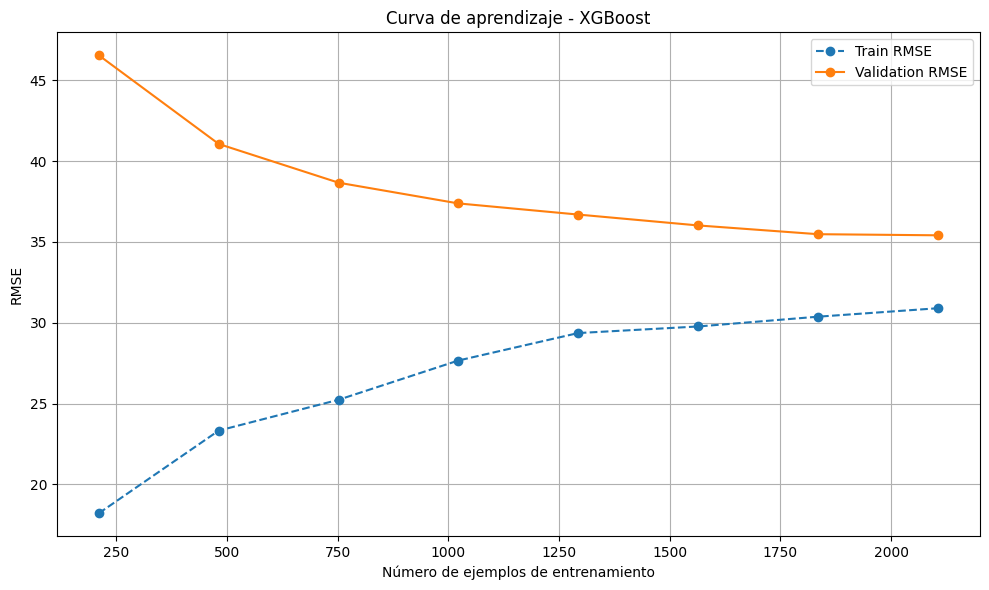

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


models_adjusted = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=7,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=250,
        learning_rate=0.03,
        max_depth=3,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        max_features=0.8,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=250,
        learning_rate=0.03,
        max_depth=3,
        min_child_weight=6,
        gamma=2,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1,
        reg_lambda=2,
        objective='reg:squarederror',
        random_state=42
    )
}


train_sizes = np.linspace(0.1, 1.0, 8)
cv = 5


for name, model in models_adjusted.items():
    train_sizes_abs, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        train_sizes=train_sizes,
        cv=cv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    train_rmse = -train_scores.mean(axis=1)
    val_rmse = -val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_rmse, label='Train RMSE', linestyle='--', marker='o')
    plt.plot(train_sizes_abs, val_rmse, label='Validation RMSE', marker='o')
    plt.title(f'Curva de aprendizaje - {name}')
    plt.xlabel('Número de ejemplos de entrenamiento')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


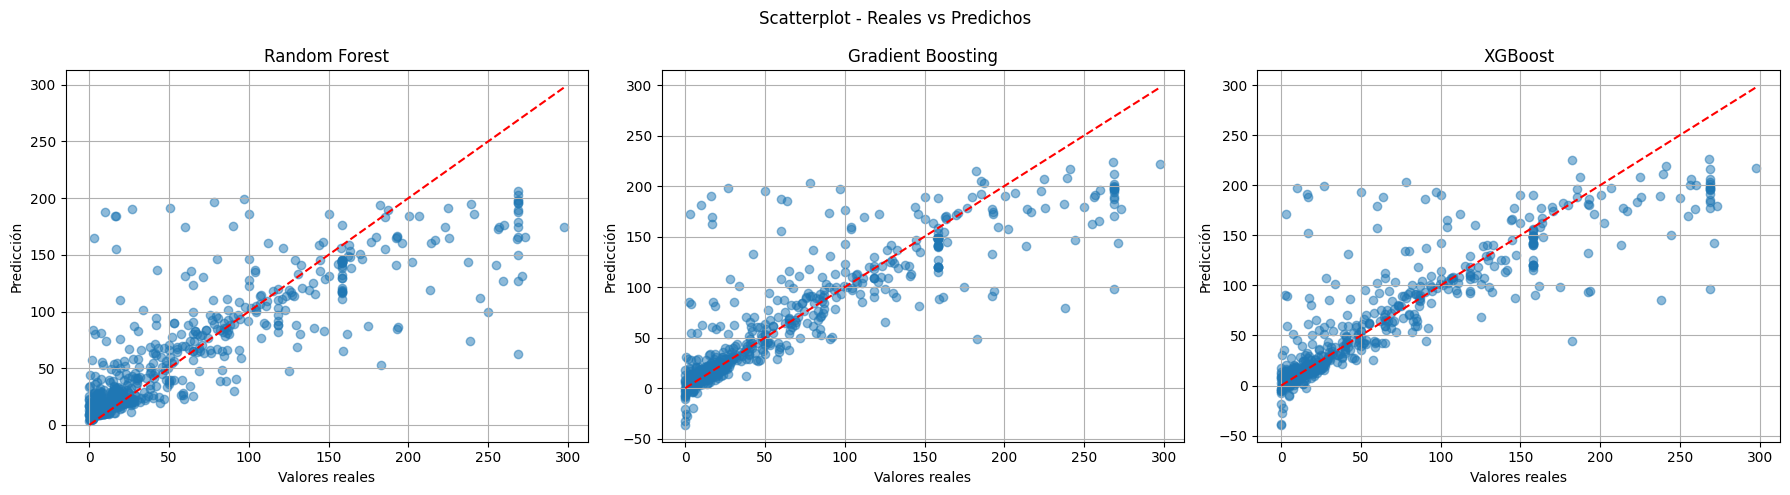

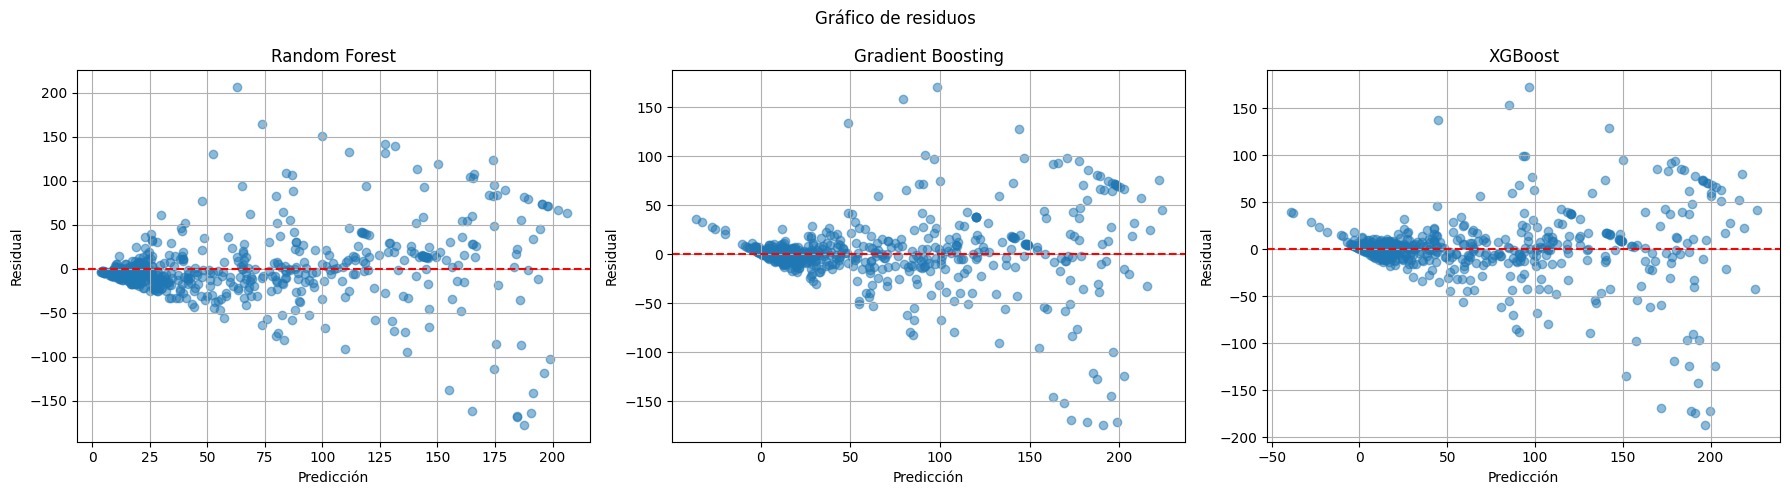

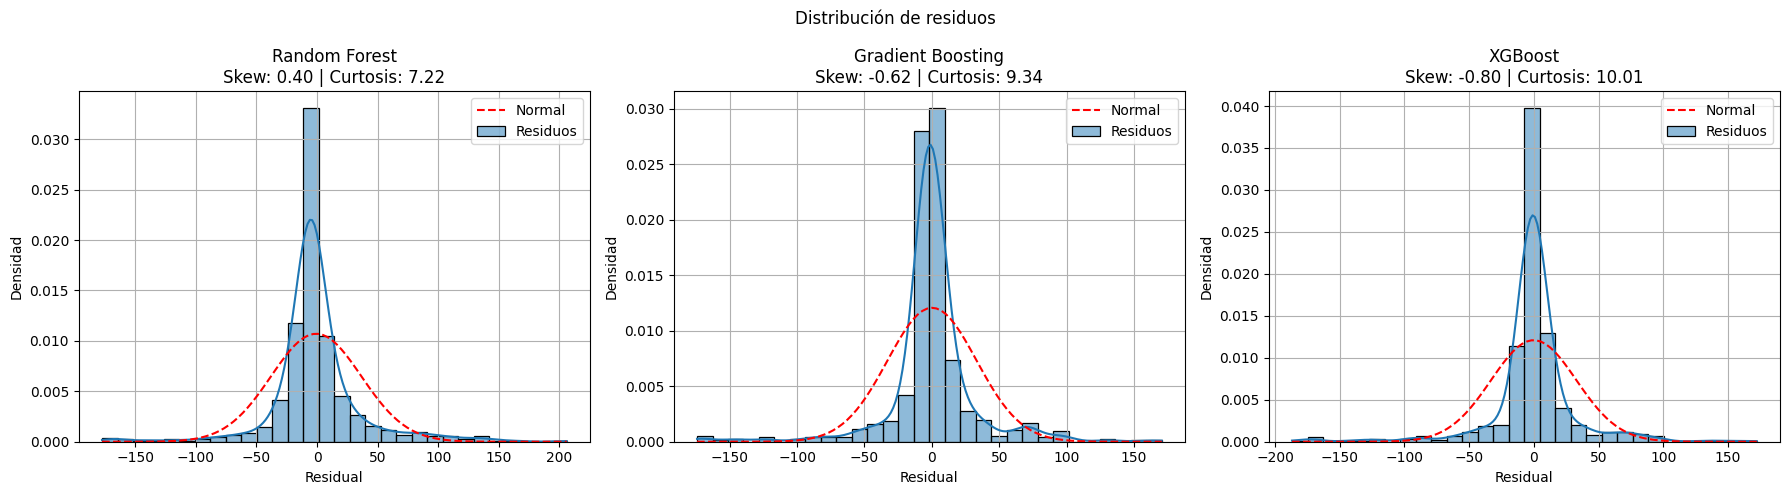

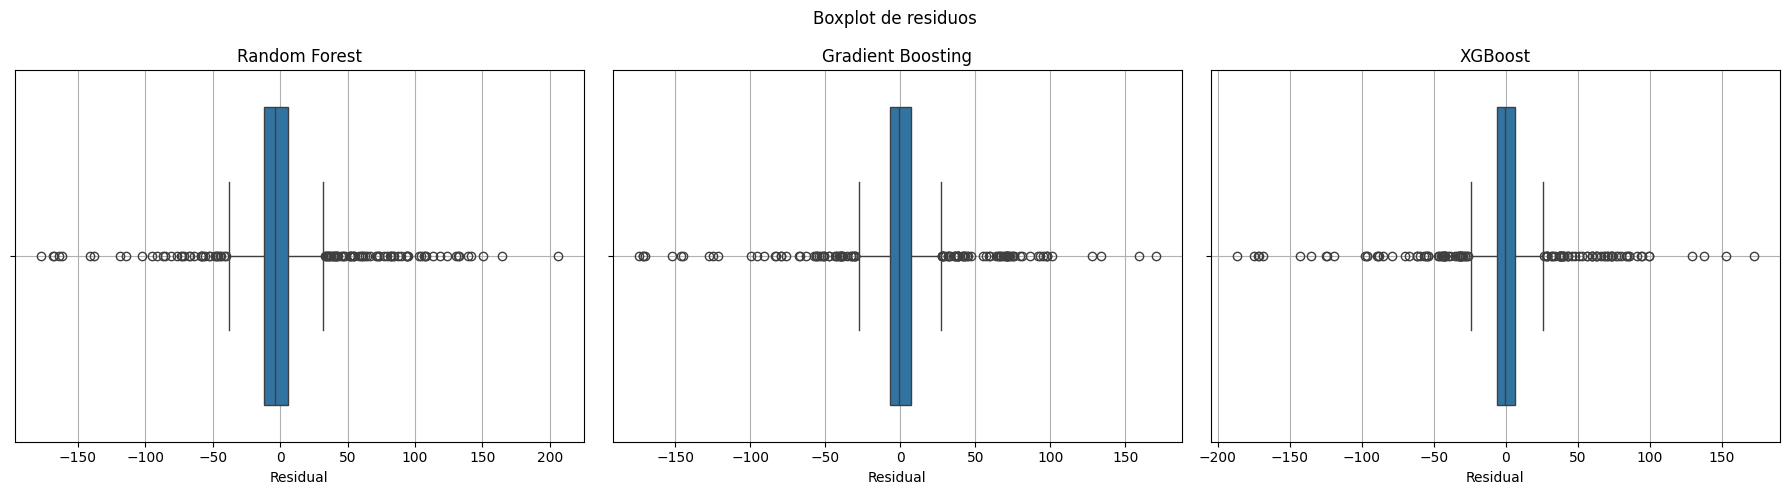

In [ ]:
from scipy.stats import kurtosis, skew, norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


model_names = list(modelos_entrenados.keys())
predicciones = {name: modelos_entrenados[name].predict(X_test) for name in model_names}
residuos = {name: y_test - y_pred for name, y_pred in predicciones.items()}


plt.figure(figsize=(18, 5))
for i, name in enumerate(model_names):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, predicciones[name], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name}')
    plt.xlabel('Valores reales')
    plt.ylabel('Predicción')
    plt.grid(True)
plt.suptitle('Scatterplot - Reales vs Predichos')
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
for i, name in enumerate(model_names):
    plt.subplot(1, 3, i+1)
    plt.scatter(predicciones[name], residuos[name], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{name}')
    plt.xlabel('Predicción')
    plt.ylabel('Residual')
    plt.grid(True)
plt.suptitle('Gráfico de residuos')
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
for i, name in enumerate(model_names):
    res = residuos[name]
    plt.subplot(1, 3, i+1)
    sns.histplot(res, kde=True, stat='density', bins=30, label='Residuos')
    x = np.linspace(res.min(), res.max(), 100)
    plt.plot(x, norm.pdf(x, loc=res.mean(), scale=res.std()), 'r--', label='Normal')
    skewness = skew(res)
    kurt = kurtosis(res)
    plt.title(f'{name}\nSkew: {skewness:.2f} | Curtosis: {kurt:.2f}')
    plt.xlabel('Residual')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
plt.suptitle('Distribución de residuos')
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
for i, name in enumerate(model_names):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=residuos[name], orient='h')
    plt.title(f'{name}')
    plt.xlabel('Residual')
    plt.grid(True)
plt.suptitle('Boxplot de residuos')
plt.tight_layout()
plt.show()


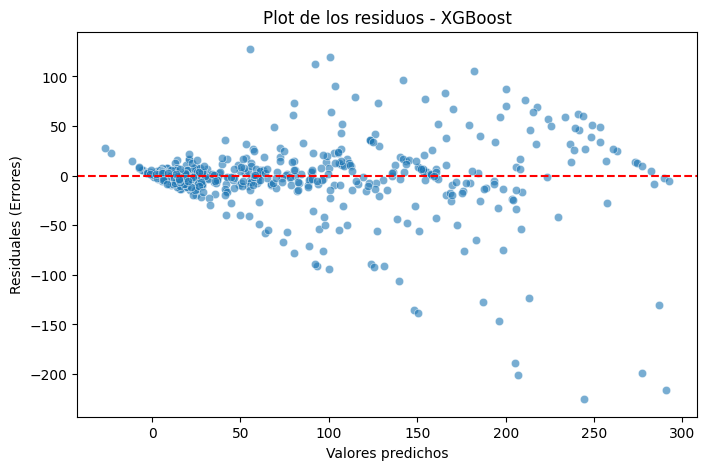

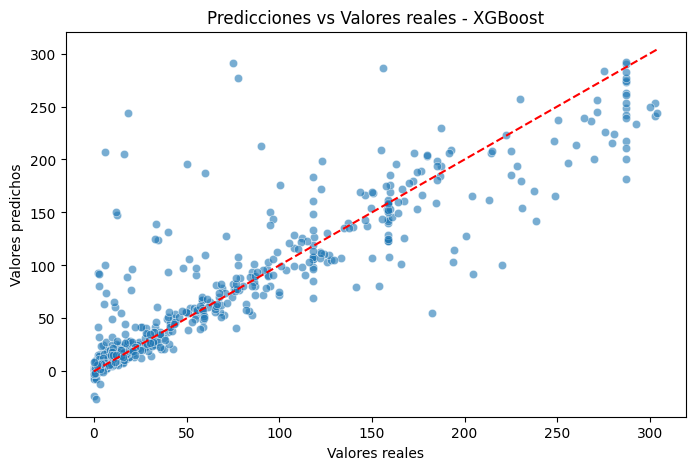

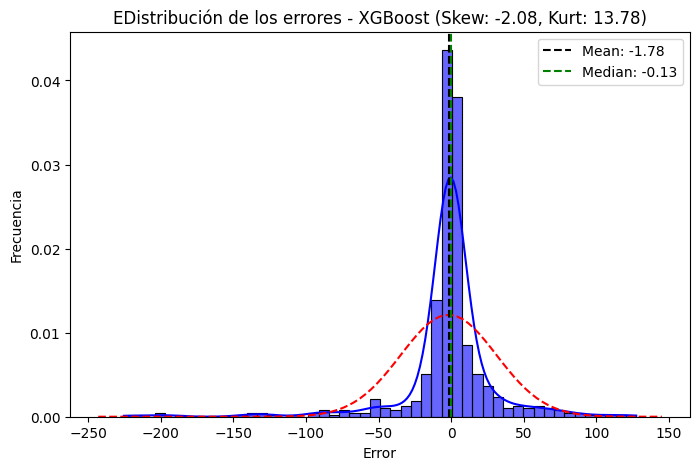

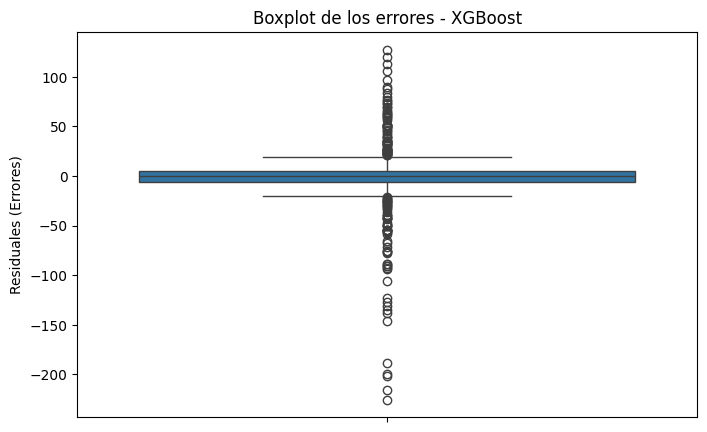

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


residuos = y_test - y_test_pred


plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Plot de los residuos - XGBoost")
plt.xlabel("Valores predichos")
plt.ylabel("Residuales (Errores)")
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.title("Predicciones vs Valores reales - XGBoost")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()


skewness = stats.skew(residuos)
kurtosis = stats.kurtosis(residuos)

plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=50, kde=True, color='blue', stat="density", alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuos), np.std(residuos))
plt.plot(x, p, 'r', linestyle="dashed")

plt.axvline(residuos.mean(), color='black', linestyle='dashed', label=f'Mean: {residuos.mean():.2f}')
plt.axvline(np.median(residuos), color='green', linestyle='dashed', label=f'Median: {np.median(residuos):.2f}')
plt.title(f"EDistribución de los errores - XGBoost (Skew: {skewness:.2f}, Kurt: {kurtosis:.2f})")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(y=residuos)
plt.title("Boxplot de los errores - XGBoost")
plt.ylabel("Residuales (Errores)")
plt.show()
